In [7]:
import networkx as nx

import pandas as pd
import numpy as np
import scipy as sp
from operator import itemgetter
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.9 MB/s eta 0:00:004.1 MB/s eta 0:00:01


# Read json to DataFrame

The information that we've collected is stored in the file 'tweets.txt'. Because this file has a JSON format, we'll take advantage of the `read_json` function of the pandas module. 

## Json

Official doc: https://www.json.org/json-en.html

- A data format designed for data exchange between systems and languages

- Essentially a tree-like structure built on two types of structure common in most programming languages (akin to dictionary and list in Python)

In [8]:
# Read json into a pandas dataframe
tweets_df = pd.read_json("tweets.txt", lines=True)

In [9]:
tweets_df.head(10)

created_at                   id               id_str  \
0 2020-11-13 05:29:14+00:00  1327121321831051266  1327121321831051264   
1 2020-11-13 05:29:14+00:00  1327121321877270531  1327121321877270528   
2 2020-11-13 05:29:14+00:00  1327121322065977348  1327121322065977344   
3 2020-11-13 05:29:14+00:00  1327121322565103616  1327121322565103616   
4 2020-11-13 05:29:14+00:00  1327121321902415873  1327121321902415872   
5 2020-11-13 05:29:14+00:00  1327121322674167808  1327121322674167808   
6 2020-11-13 05:29:14+00:00  1327121322623840256  1327121322623840256   
7 2020-11-13 05:29:14+00:00  1327121322749681665  1327121322749681664   
8 2020-11-13 05:29:14+00:00  1327121322665766912  1327121322665766912   
9 2020-11-13 05:29:14+00:00  1327121322762186752  1327121322762186752   

                                                text  \
0  RT @Princessgen2917: @jaketapper @GOPLeader @J...   
1  @raleterp @bhweingarten @LindaSuhler Yup.\n\nT...   
2  RT @Alec_Mazo: Just a thought: there is no his...   
3  RT @ChuckCallesto: BREAKING REPORT: Pennsylvan...   
4  @Alifed1 @eugenegu @realDonaldTrump Hey silly,...   
5  RT @1776Stonewall: On election night Trump was...   
6  @secupp The DNI actively participating in an e...   
7  RT @RedPillBM: I'm I the only one having faith...   
8  RT @Snowden: Watch the voting machine used in ...   
9  @asuvathaman @ayodhyasreeram Almost all Mr. Ka...   

                                              source  truncated  \
0  <a href="https://mobile.twitter.com" rel="nofo...      False   
1  <a href="http://twitter.com/download/iphone" r...       True   
2  <a href="https://mobile.twitter.com" rel="nofo...      False   
3  <a href="http://twitter.com/download/android" ...      False   
4  <a href="http://twitter.com/download/iphone" r...      False   
5  <a href="http://twitter.com/download/android" ...      False   
6  <a href="http://twitter.com/download/iphone" r...       True   
7  <a href="https://mobile.twitter.com" rel="nofo...      False   
8  <a href="http://twitter.com/download/iphone" r...      False   
9  <a href="http://twitter.com/download/android" ...       True   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1           1.327114e+18               1.327114e+18         1.392634e+08   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4           1.327115e+18               1.327115e+18         1.313232e+18   
5                    NaN                        NaN                  NaN   
6           1.327117e+18               1.327117e+18         1.926871e+07   
7                    NaN                        NaN                  NaN   
8                    NaN                        NaN                  NaN   
9           1.326986e+18               1.326986e+18         4.280955e+08   

   in_reply_to_user_id_str  ...            timestamp_ms display_text_range  \
0                      NaN  ... 2020-11-13 05:29:14.503                NaN   
1             1.392634e+08  ... 2020-11-13 05:29:14.514          [37, 140]   
2                      NaN  ... 2020-11-13 05:29:14.559                NaN   
3                      NaN  ... 2020-11-13 05:29:14.678                NaN   
4             1.313232e+18  ... 2020-11-13 05:29:14.520           [36, 90]   
5                      NaN  ... 2020-11-13 05:29:14.704                NaN   
6             1.926871e+07  ... 2020-11-13 05:29:14.692           [8, 140]   
7                      NaN  ... 2020-11-13 05:29:14.722                NaN   
8                      NaN  ... 2020-11-13 05:29:14.702                NaN   
9             4.280955e+08  ... 2020-11-13 05:29:14.725          [29, 140]   

                                      extended_tweet  \
0                                                NaN   
1  {'full_text': '@raleterp @bhweingarten @LindaS.

According to [Twitter API website](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object), the Tweet object retrieved, provided in JSON format, has a long list of mixed `root-level` attributes, including basic information such as `id`, `created_at`, and `text`. Tweet objects are also the `parent` object to several child objects. Tweet child objects include `user`, `entities`, and extended_entities.

In order to have a better idea of the information we are dealing with, let's take a look at the `DataFrame` columns.

In [10]:
tweets_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms',
       'display_text_range', 'extended_tweet', 'extended_entities',
       'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'withheld_in_countries'],
      dtype='object')

From the displayed columns, we can observe some of them that look interesting for our future analysis. If we look more in detail, certain columns, such as `retweeted_status`, `entities` provide us with information about interactions regarding user mentions and user retweets. So, we are going to create a new `DataFrame` where to store all this important information that will come in handy when we build our Network. 

In [11]:
tweets_df['retweeted_status'][0]

{'created_at': 'Fri Nov 13 02:20:31 +0000 2020',
 'id': 1327073828904726528,
 'id_str': '1327073828904726528',
 'text': '@jaketapper @GOPLeader @JoeBiden What’s insane is that you haven’t realized this election is in dispute.   Biden ha… https://t.co/8PxkFc82kS',
 'display_text_range': [33, 140],
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': True,
 'in_reply_to_status_id': 1327012242123071491,
 'in_reply_to_status_id_str': '1327012242123071491',
 'in_reply_to_user_id': 14529929,
 'in_reply_to_user_id_str': '14529929',
 'in_reply_to_screen_name': 'jaketapper',
 'user': {'id': 32550386,
  'id_str': '32550386',
  'name': '🇺🇸 Princess Elect Rachel🇲🇽',
  'screen_name': 'Princessgen2917',
  'location': 'California, USA',
  'url': None,
  'description': 'on Parler Princessgen2917 Wife, Mother. Teacher .Faith .God. Family. Country. City Girl in the Country Life. I know things 🤫 #CONSERVATIVE #PATRIOT #PROLIFE',
  'translator_type'

In [12]:
# Create a second dataframe to put important information
tweets_final = pd.DataFrame(columns = ["created_at", "id", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id",
                                      "retweeted_id", "retweeted_screen_name", "user_mentions_screen_name", "user_mentions_id", 
                                       "text", "user_id", "screen_name", "followers_count"])

In [13]:
tweets_final

Empty DataFrame
Columns: [created_at, id, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_user_id, retweeted_id, retweeted_screen_name, user_mentions_screen_name, user_mentions_id, text, user_id, screen_name, followers_count]
Index: []

In [14]:
# Columns that are going to be the same
equal_columns = ["created_at", "id", "text"]
tweets_final[equal_columns] = tweets_df[equal_columns]

In [15]:
tweets_final.head()

created_at                   id in_reply_to_screen_name  \
0 2020-11-13 05:29:14+00:00  1327121321831051266                     NaN   
1 2020-11-13 05:29:14+00:00  1327121321877270531                     NaN   
2 2020-11-13 05:29:14+00:00  1327121322065977348                     NaN   
3 2020-11-13 05:29:14+00:00  1327121322565103616                     NaN   
4 2020-11-13 05:29:14+00:00  1327121321902415873                     NaN   

  in_reply_to_status_id in_reply_to_user_id retweeted_id  \
0                   NaN                 NaN          NaN   
1                   NaN                 NaN          NaN   
2                   NaN                 NaN          NaN   
3                   NaN                 NaN          NaN   
4                   NaN                 NaN          NaN   

  retweeted_screen_name user_mentions_screen_name user_mentions_id  \
0                   NaN                       NaN              NaN   
1                   NaN                       NaN              NaN   
2                   NaN                       NaN              NaN   
3                   NaN                       NaN              NaN   
4                   NaN                       NaN              NaN   

                                                text user_id screen_name  \
0  RT @Princessgen2917: @jaketapper @GOPLeader @J...     NaN         NaN   
1  @raleterp @bhweingarten @LindaSuhler Yup.\n\nT...     NaN         NaN   
2  RT @Alec_Mazo: Just a thought: there is no his...     NaN         NaN   
3  RT @ChuckCallesto: BREAKING REPORT: Pennsylvan...     NaN         NaN   
4  @Alifed1 @eugenegu @realDonaldTrump Hey silly,...     NaN         NaN   

  followers_count  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

Now, we need to obtain important information. There are three types of interactions between two Twitter users that we should gather: retweets, replies, and mentions.

From the structure of the [JSON file](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json#tweetobject) retrieved by the Twitter API, we learn that we can obtain basic information about the user: 

In [16]:
tweets_df["user"][1]

{'id': 884414565399834624,
 'id_str': '884414565399834624',
 'name': 'Norman Young',
 'screen_name': 'NormanGYoung',
 'location': 'Florida, USA',
 'url': 'http://www.thinkoutsidepolitics.com',
 'description': "Conservative prognosticator extraordinaire. She/him (feminine nominative; masculine accusative)—don't forget to change gender when you change case, bigot!",
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 921,
 'friends_count': 546,
 'listed_count': 21,
 'favourites_count': 11521,
 'statuses_count': 28421,
 'created_at': 'Mon Jul 10 14:10:38 +0000 2017',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': '',
 'profile_background_image_url_https': '',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_colo

In [17]:
# Get the basic information about user 
def get_basics(tweets_final):
    tweets_final["screen_name"] = tweets_df["user"].apply(lambda x: x["screen_name"])
    tweets_final["user_id"] = tweets_df["user"].apply(lambda x: x["id"])
    tweets_final["followers_count"] = tweets_df["user"].apply(lambda x: x["followers_count"])
    return tweets_final

The `entities` object is a dictionary that contains, among other information, the `user_mentions` object that represents other Twitter users (`screen_name` and `id`) mentioned in the text of the Tweet.  

In [18]:
tweets_df["entities"][1]

{'hashtags': [],
 'urls': [{'url': 'https://t.co/RkdZLqFEvC',
   'expanded_url': 'https://twitter.com/i/web/status/1327121321877270531',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}],
 'user_mentions': [{'screen_name': 'raleterp',
   'name': 'Steve Raley',
   'id': 139263395,
   'id_str': '139263395',
   'indices': [0, 9]},
  {'screen_name': 'bhweingarten',
   'name': 'Benjamin Weingarten',
   'id': 1890308449,
   'id_str': '1890308449',
   'indices': [10, 23]},
  {'screen_name': 'LindaSuhler',
   'name': 'Linda Suhler, PhD',
   'id': 347627434,
   'id_str': '347627434',
   'indices': [24, 36]},
  {'screen_name': 'nytimes',
   'name': 'The New York Times',
   'id': 807095,
   'id_str': '807095',
   'indices': [74, 82]}],
 'symbols': []}

In [55]:
tweets_df["text"][1]

'@raleterp @bhweingarten @LindaSuhler Yup.\n\nThe tell, for me, was when the @nytimes suddenly changed its election pr… https://t.co/RkdZLqFEvC'

In [19]:
# Get the user mentions 
def get_usermentions(tweets_final):
    # Inside the tag 'entities' will find 'user mentions' and will get 'screen name' and 'id'
    tweets_final["user_mentions_screen_name"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["screen_name"] if x["user_mentions"] else np.nan)
    tweets_final["user_mentions_id"] = tweets_df["entities"].apply(lambda x: x["user_mentions"][0]["id_str"] if x["user_mentions"] else np.nan)
    return tweets_final

# Note how lambda function allows for this kind of conditioning

In [20]:
tweets_df["entities"][26]

{'hashtags': [{'text': 'LawAndOrder', 'indices': [0, 12]},
  {'text': 'Trump', 'indices': [17, 23]}],
 'urls': [],
 'user_mentions': [],
 'symbols': []}

In [21]:
if tweets_df["entities"][26]["user_mentions"]: 
    print('haha')
else:
    print('hehe')

hehe


The retweets always contain two Tweet objects: The original Tweet being Retweeted is provided in a `retweeted_status` object. Inside, the `user` object for the account (`screen_name` and `id`) taking the Retweet action and the time of the Retweet.  

In [22]:
tweets_df["retweeted_status"][2]

{'created_at': 'Fri Nov 13 03:10:16 +0000 2020',
 'id': 1327086349841702914,
 'id_str': '1327086349841702914',
 'text': 'Just a thought: there is no historical comparable to this election. Anyone saying the margins are too much to overc… https://t.co/NQe6e2KxAp',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 84797861,
  'id_str': '84797861',
  'name': 'Alec Mazo',
  'screen_name': 'Alec_Mazo',
  'location': None,
  'url': None,
  'description': 'Invest in stuff. Ex-CIO/CFO at startups. Stanford GSB Sloan & UC Berkeley Alumni. Can dance a little...',
  'translator_type': 'none',
  'protected': False,
  'verified': True,
  'followers_count': 8965,
  'friends_count': 684,
  'listed_count': 305,
  'favourites_count': 12425,
  'statuses_count

In [23]:
# Get retweets
def get_retweets(tweets_final):
    # Inside the tag 'retweeted_status' will find 'user' and will get 'screen name' and 'id'    
    tweets_final["retweeted_screen_name"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else np.nan)
    tweets_final["retweeted_id"] = tweets_df["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else np.nan)
    return tweets_final

From the Tweet object, we can get the information of the user and status to which the tweet replies to:

In [24]:
# Get the information about replies
def get_in_reply(tweets_final):
    # Just copy the 'in_reply' columns to the new dataframe
    tweets_final["in_reply_to_screen_name"] = tweets_df["in_reply_to_screen_name"]
    tweets_final["in_reply_to_status_id"] = tweets_df["in_reply_to_status_id"]
    tweets_final["in_reply_to_user_id"]= tweets_df["in_reply_to_user_id"]
    return tweets_final

Now, we define a function that calls all the functions to fill the DataFrame with the usefull variables.

In [25]:
# Lastly fill the new dataframe with the important information
def fill_df(tweets_final):
    get_basics(tweets_final)
    get_usermentions(tweets_final)
    get_retweets(tweets_final)
    get_in_reply(tweets_final)
    return tweets_final

Now, we fill the DataFrame and discard the None values.

In [26]:
tweets_final = fill_df(tweets_final)

In [27]:
tweets_final.head(10)

created_at                   id in_reply_to_screen_name  \
0 2020-11-13 05:29:14+00:00  1327121321831051266                    None   
1 2020-11-13 05:29:14+00:00  1327121321877270531                raleterp   
2 2020-11-13 05:29:14+00:00  1327121322065977348                    None   
3 2020-11-13 05:29:14+00:00  1327121322565103616                    None   
4 2020-11-13 05:29:14+00:00  1327121321902415873                 Alifed1   
5 2020-11-13 05:29:14+00:00  1327121322674167808                    None   
6 2020-11-13 05:29:14+00:00  1327121322623840256                  secupp   
7 2020-11-13 05:29:14+00:00  1327121322749681665                    None   
8 2020-11-13 05:29:14+00:00  1327121322665766912                    None   
9 2020-11-13 05:29:14+00:00  1327121322762186752             asuvathaman   

   in_reply_to_status_id  in_reply_to_user_id        retweeted_id  \
0                    NaN                  NaN            32550386   
1           1.327114e+18         1.392634e+08                 NaN   
2                    NaN                  NaN            84797861   
3                    NaN                  NaN          4765364386   
4           1.327115e+18         1.313232e+18                 NaN   
5                    NaN                  NaN  800086706678419456   
6           1.327117e+18         1.926871e+07                 NaN   
7                    NaN                  NaN           450492561   
8                    NaN                  NaN          2916305152   
9           1.326986e+18         4.280955e+08                 NaN   

  retweeted_screen_name user_mentions_screen_name     user_mentions_id  \
0       Princessgen2917           Princessgen2917             32550386   
1                   NaN                  raleterp            139263395   
2             Alec_Mazo                 Alec_Mazo             84797861   
3         ChuckCallesto             ChuckCallesto           4765364386   
4                   NaN                   Alifed1  1313231571466375168   
5         1776Stonewall             1776Stonewall   800086706678419456   
6                   NaN                    secupp             19268706   
7             RedPillBM                 RedPillBM            450492561   
8               Snowden                   Snowden           2916305152   
9                   NaN               asuvathaman            428095455   

                                                text              user_id  \
0  RT @Princessgen2917: @jaketapper @GOPLeader @J...             83587516   
1  @raleterp @bhweingarten @LindaSuhler Yup.\n\nT...   884414565399834624   
2  RT @Alec_Mazo: Just a thought: there is no his...            279134171   
3  RT @ChuckCallesto: BREAKING REPORT: Pennsylvan...           2343343940   
4  @Alifed1 @eugenegu @realDonaldTrump Hey silly,...  1260411014601818112   
5  RT @1776Stonewall: On election night Trump was...            531586866   
6  @secupp The DNI actively participating in an e...   962827494876381185   
7  RT @RedPillBM: I'm I the only one having faith...           4799007915   
8  RT @Snowden: Watch the voting machine used in ...  1039254994514374656   
9  @asuvathaman @ayodhyasreeram Almost all Mr. Ka...   985109841914970112   

       screen_name  followers_count  
0        kwicgov55            10797  
1     NormanGYoung              921  
2    MyPresidentme             9557  
3       MBurns0420              119  
4  onlythefactssir              419  
5   GramroRosemary             4038  
6        puregoldj               54  
7    DavioAdrienne             2735  
8     NancyMaxson1              114  
9    NRAGHUNATHAN5               18

Be aware of None values!

In [28]:
tweets_final = tweets_final.where(pd.notnull(tweets_final), None)

In [29]:
pd.notnull(tweets_final)

created_at    id  in_reply_to_screen_name  in_reply_to_status_id  \
0           True  True                    False                  False   
1           True  True                     True                   True   
2           True  True                    False                  False   
3           True  True                    False                  False   
4           True  True                     True                   True   
...          ...   ...                      ...                    ...   
4611        True  True                    False                  False   
4612        True  True                    False                  False   
4613        True  True                     True                   True   
4614        True  True                    False                  False   
4615        True  True                    False                  False   

      in_reply_to_user_id  retweeted_id  retweeted_screen_name  \
0                   False          True                   True   
1                    True         False                  False   
2                   False          True                   True   
3                   False          True                   True   
4                    True         False                  False   
...                   ...           ...                    ...   
4611                False          True                   True   
4612                False          True                   True   
4613                 True         False                  False   
4614                False          True                   True   
4615                False         False                  False   

      user_mentions_screen_name  user_mentions_id  text  user_id  screen_name  \
0                          True              True  True     True         True   
1                          True              True  True     True         True   
2                          True              True  True     True         True   
3                          True              True  True     True         True   
4                          True              True  True     True         True   
...                         ...               ...   ...      ...          ...   
4611                       True              True  True     True         True   
4612                       True              True  True     True         True   
4613                       True              True  True     True         True   
4614                       True              True  True     True         True   
4615                      False             False  True     True         True   

      followers_count  
0                True  
1                True  
2                True  
3                True  
4                True  
...               ...  
4611             True  
4612             True  
4613             True  
4614             True  
4615             True  

[4616 rows x 13 columns]

In [30]:
tweets_final.head(5)

created_at                   id in_reply_to_screen_name  \
0 2020-11-13 05:29:14+00:00  1327121321831051266                    None   
1 2020-11-13 05:29:14+00:00  1327121321877270531                raleterp   
2 2020-11-13 05:29:14+00:00  1327121322065977348                    None   
3 2020-11-13 05:29:14+00:00  1327121322565103616                    None   
4 2020-11-13 05:29:14+00:00  1327121321902415873                 Alifed1   

   in_reply_to_status_id  in_reply_to_user_id retweeted_id  \
0                    NaN                  NaN     32550386   
1           1.327114e+18         1.392634e+08         None   
2                    NaN                  NaN     84797861   
3                    NaN                  NaN   4765364386   
4           1.327115e+18         1.313232e+18         None   

  retweeted_screen_name user_mentions_screen_name     user_mentions_id  \
0       Princessgen2917           Princessgen2917             32550386   
1                  None                  raleterp            139263395   
2             Alec_Mazo                 Alec_Mazo             84797861   
3         ChuckCallesto             ChuckCallesto           4765364386   
4                  None                   Alifed1  1313231571466375168   

                                                text              user_id  \
0  RT @Princessgen2917: @jaketapper @GOPLeader @J...             83587516   
1  @raleterp @bhweingarten @LindaSuhler Yup.\n\nT...   884414565399834624   
2  RT @Alec_Mazo: Just a thought: there is no his...            279134171   
3  RT @ChuckCallesto: BREAKING REPORT: Pennsylvan...           2343343940   
4  @Alifed1 @eugenegu @realDonaldTrump Hey silly,...  1260411014601818112   

       screen_name  followers_count  
0        kwicgov55            10797  
1     NormanGYoung              921  
2    MyPresidentme             9557  
3       MBurns0420              119  
4  onlythefactssir              419

# Creart a Graph

Now, it's time to initialize the Graph. We can do this by calling the function .Graph() of NetworkX.

In [31]:
graph = nx.Graph()

There are two other important functions to create a Graph. The first one is add_node()and the second one, add_edge both with a very descriptive name. Let's pay attention to the syntax of add_edge:  

`Graph.add_edge(u_of_edge, v_of_edge, **attr)`  

where `u`, `v` are the nodes, and attr are keyword arguments that characterize the edge data such as weight, capacity, length, etc.
  
If we add an edge that already exists, the edge data will get updated. Also, if we are an edge between two nodes that are still not in the Graph, the nodes will be created in the process.

We are going to populate the Graph by creating a function `get_interactions`. With this information, we apply the function add_edge to every tuple consisting of the tweet's user_id and the user_id of the user mentioned, replied to or retweeted, creating the nodes and the edges connecting them. Also, the tweet id will be added as edge data.

In [32]:
# Get the interactions between the different users
def get_interactions(row):
    # For each row of the original dataframe
    # First we obtain the 'user_id' and 'screen_name'
    user = row["user_id"], row["screen_name"]
    # Be careful if there is no user id
    if user[0] is None:
        return (None, None), []
    
    # The interactions are going to be a set of tuples
    interactions = set()
    # Add all interactions — Note here we don't distinguish different kinds of interactions. 
    # First, we add the interactions corresponding to replies adding the id and screen_name
    interactions.add((row["in_reply_to_user_id"], row["in_reply_to_screen_name"]))
    # After that, we add the interactions with retweets
    interactions.add((row["retweeted_id"], row["retweeted_screen_name"]))
    # And later, the interactions with user mentions
    interactions.add((row["user_mentions_id"], row["user_mentions_screen_name"]))
    
    # Discard if user id is in interactions
    interactions.discard((row["user_id"], row["screen_name"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

In [33]:
for index, tweet in tweets_final.iterrows():
    user, interactions = get_interactions(tweet)
    user_id, user_name = user
    tweet_id = tweet["id"]
    
    for interaction in interactions:
        int_id, int_name = interaction
        graph.add_edge(user_id, int_id, tweet_id=tweet_id)
        graph.nodes[user_id]["name"] = user_name
        graph.nodes[int_id]["name"] = int_name       

Now that we have the node and edge of the Graph created, let's see the number of nodes and edges present:

In [34]:
print(f"There are {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges present in the Graph")

There are 9677 nodes and 8597 edges present in the Graph


The degree of a node u, denoted as deg(u), is the number of edges that occur to that node. In simpler words, the number of connections a particular node has. The maximum degree of a graph and the minimum degree of a graph are the maximum and minimum degree of its nodes, respectively.

In [35]:
list(graph.degree())

[(83587516, 2),
 (nan, 1),
 ('32550386', 1),
 (884414565399834624, 2),
 ('139263395', 1),
 (139263395.0, 1),
 (279134171, 2),
 ('84797861', 23),
 (nan, 1),
 (2343343940, 4),
 (nan, 1),
 ('4765364386', 25),
 (1260411014601818112, 2),
 ('1313231571466375168', 1),
 (1.3132315714663752e+18, 1),
 (531586866, 4),
 ('800086706678419456', 34),
 (nan, 1),
 (962827494876381185, 2),
 ('19268706', 5),
 (19268706.0, 1),
 (4799007915, 6),
 ('450492561', 28),
 (nan, 1),
 (1039254994514374656, 4),
 (nan, 1),
 ('2916305152', 14),
 (985109841914970112, 2),
 ('428095455', 1),
 (428095455.0, 1),
 (17040554, 2),
 (nan, 1),
 ('2402214960', 9),
 (184525004, 2),
 (nan, 1),
 ('1079776144524754944', 8),
 (1322183486879469573, 2),
 ('25073877', 142),
 (25073877.0, 61),
 (1314041476922343424, 2),
 ('49031364', 7),
 (nan, 1),
 (1121801856, 2),
 ('47293791', 32),
 (nan, 1),
 (244760161, 1),
 (nan, 1),
 (350279150, 2),
 ('29097819', 21),
 (nan, 1),
 (554375975, 2),
 ('33608041', 6),
 (nan, 1),
 (32713778, 4),
 ('130

In [36]:
degrees = [val for (node, val) in graph.degree()]

In [37]:
degrees[:10]

[2, 1, 1, 2, 1, 1, 2, 23, 1, 4]

In [38]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")  

The maximum degree of the Graph is 142
The minimum degree of the Graph is 1


In [39]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {sp.stats.mode(degrees)[0][0]}") 

The average degree of the nodes in the Graph is 1.8


IndexError: invalid index to scalar variable.

An undirected graph is connected if, for every pair of nodes, there is a path between them. For that to happen, most of the nodes should have at least a degree of two, except for those denominated leaves which have a degree of 1. From the characteristics of the Graph, we can suspect that the graph is not connected. In order to confirm these, we can use `nx.is_connected`.

In [40]:
if nx.is_connected(graph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


Now, that we confirm that our Graph is not connected, we can check how many connected components it has:

In [41]:
print(f"There are {nx.number_connected_components(graph)} connected components in the Graph")  

There are 1359 connected components in the Graph


In [42]:
largest_subgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)

In [43]:
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \
edges present in the largest component of the Graph")

There are 4613 nodes and 4864 edges present in the largest component of the Graph


In [44]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


Clustering and transitivity measure the tendency for nodes to cluster together or for edges to form triangles. In our context, they are measures of the extent to which the users interacting with one particular user tend to interact with each other as well. The difference is that transitivity weights nodes with a large degree higher. 
The clustering coefficient, a measure of the number of triangles in a graph, is calculated as the number of triangles connected to node i divided by the number of sets of two edges connected to node i (Triple nodes). While the transitivity coefficient is calculated as 3 multiply by the number of triangles in the network divided by the number of connected triples of nodes in the network. These two parameters are very important when analyzing social networks because it gives us an insight into how users tend to create tightly knot groups characterized by relatively high-dense ties.

In [45]:
print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

# Not a very dense network

The average clustering coefficient is 0.0 in the largest subgraph
The transitivity of the largest subgraph is 0


Now, we are going to focus on **network centrality** which captures the importance of a node's position in the network considering: degree on the assumption that an important node will have many connections, closeness on the assumption that important nodes are close to other nodes, and finally, betweenness on the assumption that important nodes are well situated and connect other nodes. Here we try `degree_centrality` and capture the node with the best score in each one.

In [46]:
graph_centrality = nx.degree_centrality(largest_subgraph)

In [47]:
max_de = max(graph_centrality.items(), key=itemgetter(1))

In [48]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")

the node with id 25073877 has a degree centrality of 0.03 which is the maximum of the Graph


- Now, we can see how the network graph looks like. 

- We will use nx.drawing.layout with node positioning algorithms for drawing network graph. 

    - Use spring_layout that uses force-directed graph drawing which purpose is to position the nodes in two-dimensional space so that all the edges are of equal length and as few crossing edges as possible. 
    - It achieves this by assigning forces among the set of edges and nodes based on their relative positions and then uses this to simulate the motion of the edges and nodes. One of the parameters that we can adjust is k, the optimal distance between nodes; as we increase the value, the nodes will farther apart.  Once, that we got the positions, we are also going to create a special list so that we can draw the two nodes with higher centrality that we found in different colors to highlight them.

In [49]:
colors_central_nodes = ['red']
central_nodes = ['25073877']

In [50]:
pos = nx.spring_layout(largest_subgraph, k=0.05)

Finally, we can use the functions `.draw_networkx_nodes()` and `.draw()` to show the largest connected component:

/Users/jingchenli/opt/anaconda3/envs/css/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


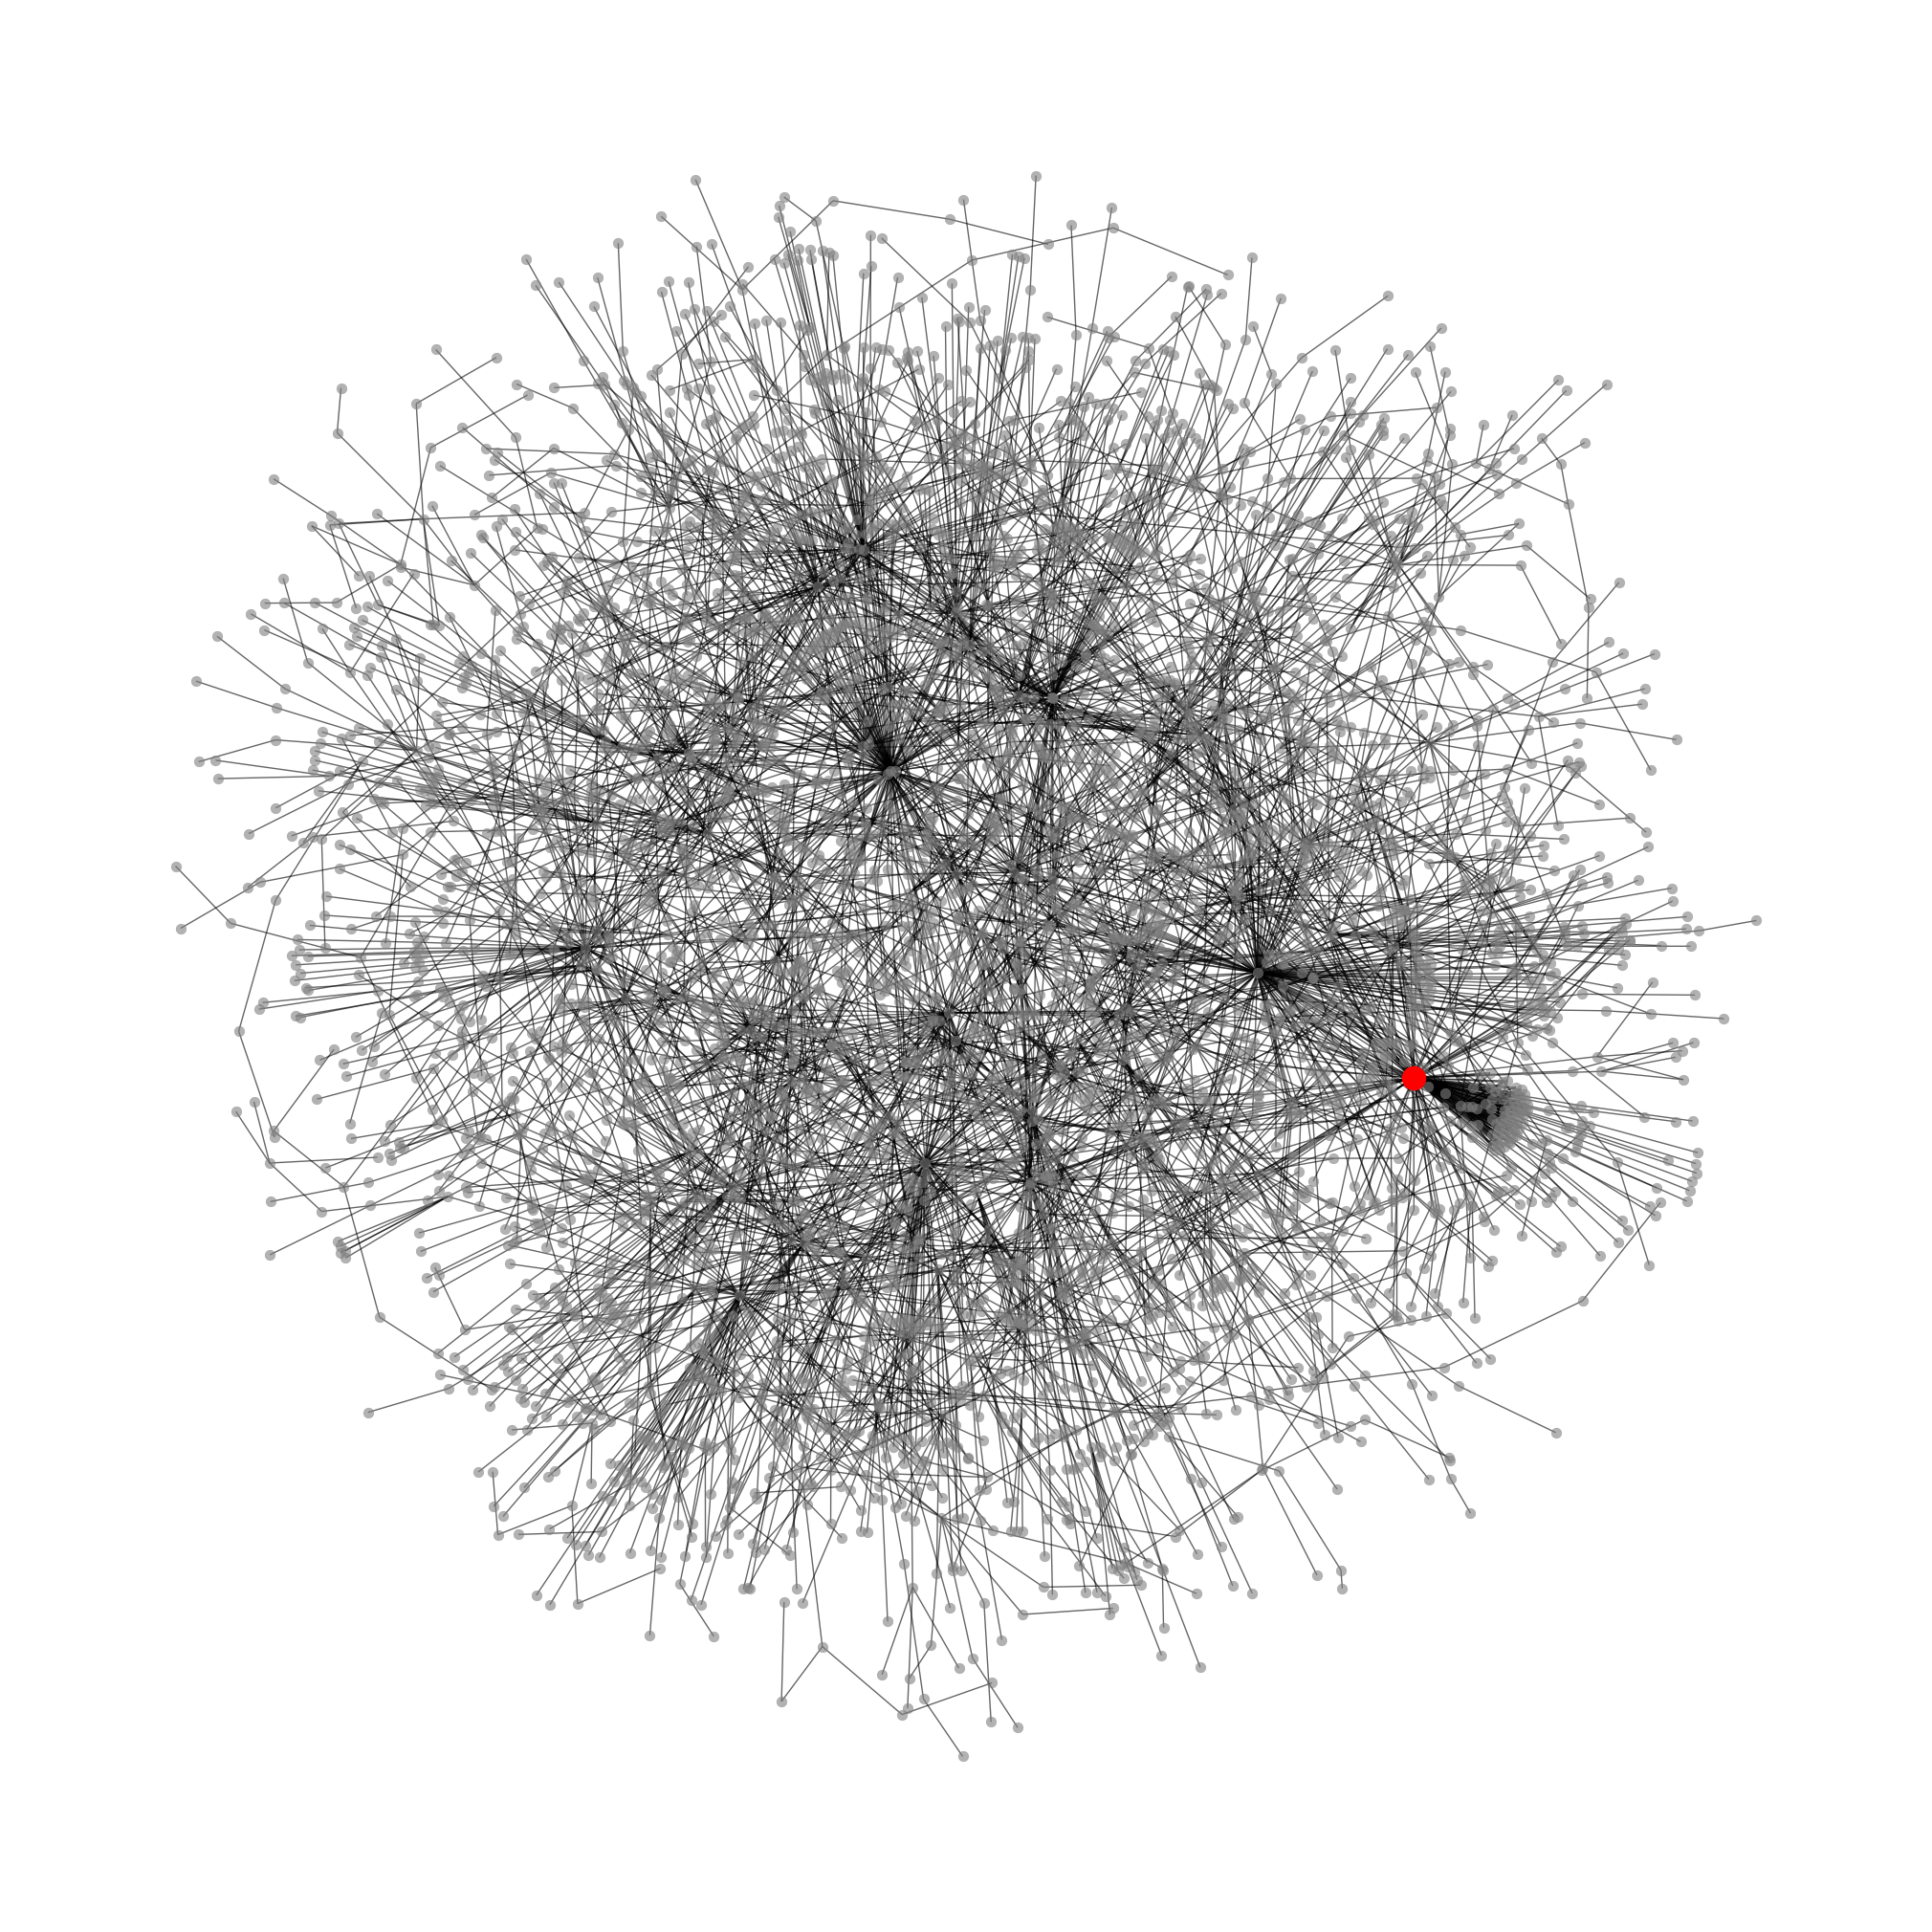

In [51]:
plt.figure(figsize = (20,20))

nx.draw(largest_subgraph, pos=pos, node_color='grey', cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)

plt.savefig('graphfinal.png')
plt.show()